# Pima Indians Diabetes Binary Classfication
---

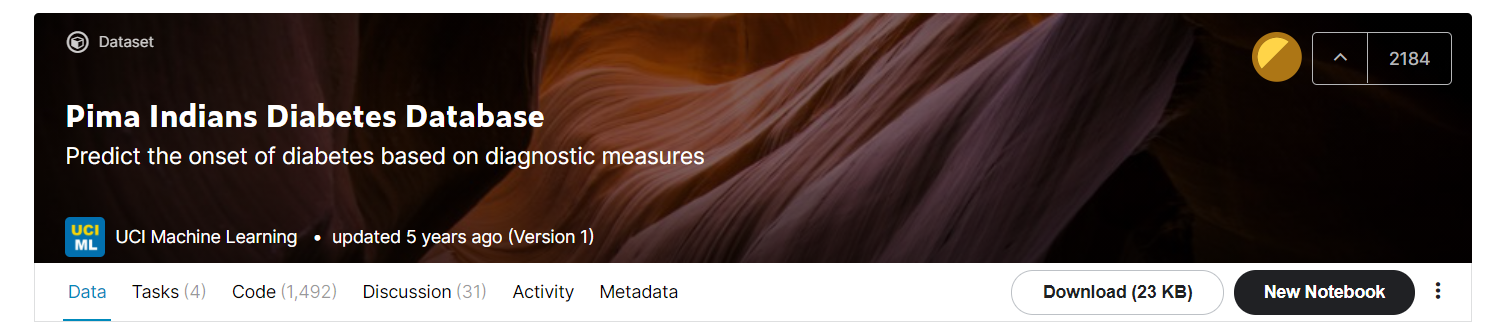

# Libray Import & Data Load
----

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

In [13]:
diabetes = pd.read_csv("../data/diabetes.csv")
print("----------SHAPE-------------")
print(diabetes.shape)
print("----------OUTCOME VALUE COUNTS-------------")
print(diabetes['Outcome'].value_counts())
print("----------NULL-------------")
print(diabetes.isnull().sum())
print("----------DATA PREVIEW-------------")
print(diabetes.info())
diabetes.head()

----------SHAPE-------------
(768, 9)
----------OUTCOME VALUE COUNTS-------------
0    500
1    268
Name: Outcome, dtype: int64
----------NULL-------------
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------DATA PREVIEW-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 n

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Info
---

- Pregnancies : 임신 횟수


- Glucoes : 포도당 부하 검사 수치


- BloodPressure : 혈압(mm Hg)


- SkinThickness : 팔 삼두근 뒤쪽의 피하치방(mm)


- Insulin : 혈청 인슐린(mu U/ml)


- BMI : 체질량지수(체중(kg)/키(m))^2)


- DiabetesPedigreeFunction : 당뇨 내력 가중치 값


- Age : 나이


- Outcome : 클래스 결정 값 (0,1)

# Corr Info
---

In [19]:
diabetes.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


# Data Preprocessing
---

In [33]:
# 오차 측정지표를 구하기 위한 함수 정의

def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    # ROC AUC 
    roc_auc = roc_auc_score(y_test, pred_proba) 
    
    print('Confusion Matrix') 
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format( accuracy, precision, recall, f1, roc_auc))

In [32]:
# 학습 피쳐, 레이블 분리
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# train, test data split, 레이블 비율 동일하게
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Logstic Regression Model
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix
[[89 11]
 [23 31]]
accuracy: 0.7792, precision: 0.7381, recall: 0.5741, f1: 0.6458, roc_auc: 0.8219


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


상대적으로 recall의 점수가 낮습니다. recall 점수가 낮다는 뜻의 의미는 실제 당뇨병 환자를 양성으로 예측하지 못한 것으로 recall 점수를 높이기 위해 임곗값을 조정합니다.

# Precision, Recall Curve
---

In [43]:
# 임계값에 따른 precision, recall 점수 변화 시각화

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

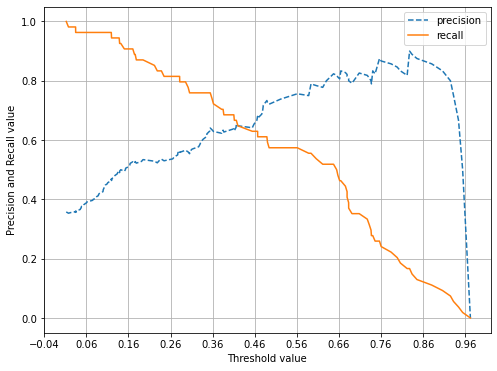

In [44]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

임곗값이 0.42가 되는 구간에서 Precision과 Recall score가 균형을 맞추지만 두 점수 모두 0.7 미만이기에 원본 데이터의 통계량을 다시 확인.

In [45]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min 값이 0인 피쳐가 상당히 많은 것으로 파악. 

특히 Glucose 는 포도당 수치로 min 값이 0 이라는 것은 잘못된 데이터로 판단.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

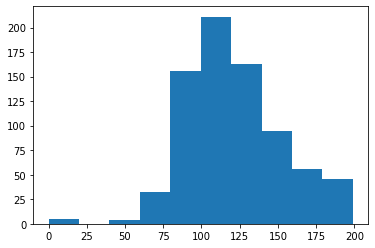

In [47]:
plt.hist(diabetes.Glucose, bins=10)

min() 값이 0으로 된 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

In [49]:
# 0값을 검사할 피처 명 리스트

zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수

total_count = diabetes['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출, 퍼센트 계산

for feature in zero_features:
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print('{} 0 건수는 {}, 퍼센트 {}'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트 0.6510416666666666
BloodPressure 0 건수는 35, 퍼센트 4.557291666666667
SkinThickness 0 건수는 227, 퍼센트 29.557291666666668
Insulin 0 건수는 374, 퍼센트 48.697916666666664
BMI 0 건수는 11, 퍼센트 1.4322916666666667


SkinThickness, Insulin의 0 값은 상당히 높은 비율을 차지하기 때문에 일괄적으로 삭제할 경우 올바른 학습이 어려워 0값을 평균값으로 대체

In [51]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체

mean_zero_features= diabetes[zero_features].mean()
diabetes[zero_features]=diabetes[zero_features].replace(0, mean_zero_features)

In [54]:
# 0값을 평균값으로 대체한 데이터 세트에 피처 스케일링 적용
# 로지스틱 회귀는 일반적으로 스케일링 적용이 좋음

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# StandardScaler 클래스 이용 피처 데이터 세트 일괄적 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix
[[90 10]
 [21 33]]
accuracy: 0.7987, precision: 0.7674, recall: 0.6111, f1: 0.6804, roc_auc: 0.8433


성능이 약간 상승했지만 아직 recall 점수가 낮음.

In [86]:
def get_eval_by_threshold(y_test, pred_proba, thresholds): 
    
    accuracy=[]
    precision=[]
    recall=[]
    F1 = []
    ROC_AUC = []
    
    for i in thresholds: 
        binarizer = Binarizer(threshold = i).fit(pred_proba) 
        pred = binarizer.transform(pred_proba)
        accuracy.append(accuracy_score(y_test, pred)) 
        precision.append(precision_score(y_test, pred)) 
        recall.append(recall_score(y_test, pred))
        F1.append(f1_score(y_test, pred))
        ROC_AUC.append(roc_auc_score(y_test, pred))
        
    print(pd.DataFrame({'Thresholds':thresholds,
                 'accuracy':accuracy,
                 'precision':precision,
                 'recall':recall,
                 'F1':F1,
                 'ROC_AUC':ROC_AUC}))

In [87]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

   Thresholds  accuracy  precision    recall        F1   ROC_AUC
0        0.30  0.714286   0.565789  0.796296  0.661538  0.733148
1        0.33  0.740260   0.600000  0.777778  0.677419  0.748889
2        0.36  0.746753   0.619048  0.722222  0.666667  0.741111
3        0.39  0.753247   0.633333  0.703704  0.666667  0.741852
4        0.42  0.779221   0.692308  0.666667  0.679245  0.753333
5        0.45  0.785714   0.705882  0.666667  0.685714  0.758333
6        0.48  0.798701   0.744681  0.648148  0.693069  0.764074
7        0.50  0.798701   0.767442  0.611111  0.680412  0.755556


위 표에서 전체적인 성능 평가 지표를 유지하면서 재현율을 향상하는 좋은 임계값으로 0.48을 선택합니다.

In [89]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array 에서 1에 해당하는 컬럼을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, -1])

Confusion Matrix
[[88 12]
 [19 35]]
accuracy: 0.7987, precision: 0.7447, recall: 0.6481, f1: 0.6931, roc_auc: 0.8433
